In [10]:
x_obs = [6.9609,6.9804,7.0054,7.0183,7.0496,7.0693,7.1271,7.1339,
           7.1765,7.1995,7.1201,7.1140,7.1440,7.1554,7.1670,7.1725,7.1705,7.1925,7.1951,
7.2006,7.2285,7.2134,7.2244,7.2629,7.2693,7.1710,7.2244,7.2499,7.3015,7.2730]
t = np.arange(0, 30)


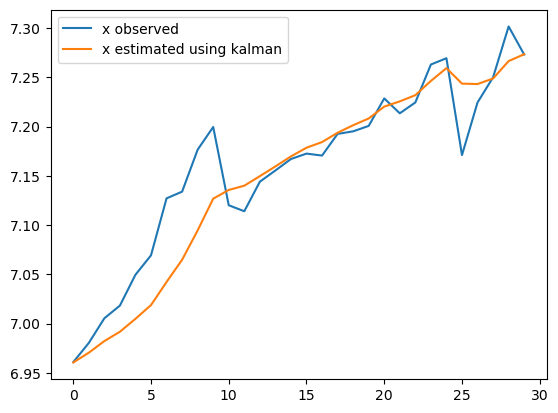

In [13]:
class Kalman:
    def __init__(self, x, P, H):
        self.x = x # [state * 1]
        self.P = P # [state * state]
        self.H = H # [obs * state]
        
    def predict(self, F, Q):
        self.x = F @ self.x 
        self.P = F @ self.P @ F.T + Q
    
    def update(self, z, R):
        y = z - self.H @ self.x
        S = self.H @ self.P @ self.H.T + R
        K = self.P @ self.H.T @ np.linalg.inv(S)
        self.x = self.x + K @ y
        self.P = self.P - K @ self.H @ self.P

# 注意 P 初值的设定，若不能确定状态处置，则将方差设为仅位置项为极大值
kalman = Kalman(np.array([0, 0]), P=np.array([[1e6, 0], [0, 0]]), H=np.array([[1, 0]]))
pos_v_kalman = []
for i in range(30):
    kalman.predict(F=np.array([[1, t[i] - t[i - 1] if i > 0 else 0], [0, 1]]), Q=np.array([[0.1, 0], [0, 0.1]]))
    kalman.update(z=np.array([x_obs[i]]), R=np.eye(1) * 50)
    pos_v_kalman.append(kalman.x)

plot_tuple([(t, x_obs, 'x observed'), (t, [x[0] for x in pos_v_kalman], 'x estimated using kalman')])
